In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import preprocessing

import math

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from random import shuffle

In [36]:
music_df = pd.read_csv('../music_data/billboard_top_100_1960_1969.csv', na_values=['NA'])

In [37]:
music_df.describe(include='all')

,Rank,Artist,Title,Year,SpotifyPlayCount
count,1000.000000,1000,1000,1000.000000,1.000000e+03
unique,NaN,547,987,NaN,NaN
top,NaN,The Beatles,I Like It Like That,NaN,NaN
freq,NaN,23,2,NaN,NaN
mean,50.547000,NaN,NaN,1964.501000,7.899716e+06
std,28.922799,NaN,NaN,2.875111,1.992259e+07
min,1.000000,NaN,NaN,1960.000000,1.554000e+03
25%,25.750000,NaN,NaN,1962.000000,2.437070e+05
50%,50.500000,NaN,NaN,1964.500000,8.641245e+05
75%,76.000000,NaN,NaN,1967.000000,4.963935e+06


# 1. Visualization

## 1.1 Correlation Analysis

In [38]:
# Pearson correlation analysis
correlation = music_df.corr(method='pearson')
correlation

,Rank,Year,SpotifyPlayCount
Rank,1.000000,0.002575,-0.162270
Year,0.002575,1.000000,0.166069
SpotifyPlayCount,-0.162270,0.166069,1.000000


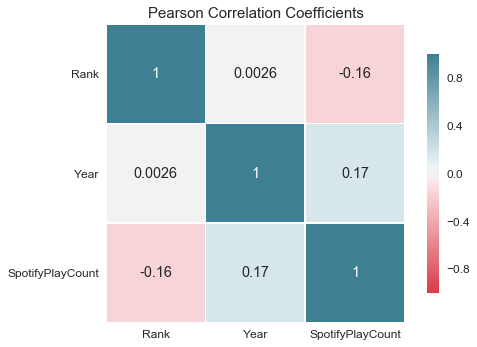

In [5]:
sns.set(style="white", font_scale=1.2)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Plot the Pearson correlation heatmap
ax = sns.heatmap(correlation, cmap=cmap, annot=True, center=0, 
                 square=True, linewidths=.7, cbar_kws={"shrink": .8})
plt.yticks(rotation=0) 
ax.set_title('Pearson Correlation Coefficients', fontsize=15)

plt.savefig('../figure/correlation_heatmap.png')

In [39]:
# Pearson correlation analysis - log(SpotifyPlayCount)
music_df_logtarget = music_df.copy()
music_df_logtarget.SpotifyPlayCount = np.log(music_df_logtarget.SpotifyPlayCount)
correlation = music_df_logtarget.corr(method='pearson')
correlation

,Rank,Year,SpotifyPlayCount
Rank,1.000000,0.002575,-0.266992
Year,0.002575,1.000000,0.271174
SpotifyPlayCount,-0.266992,0.271174,1.000000


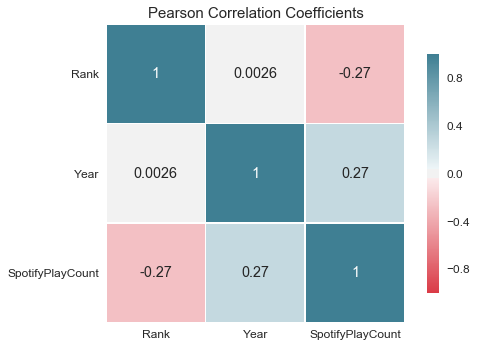

In [7]:
sns.set(style="white", font_scale=1.2)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Plot the Pearson correlation heatmap
ax = sns.heatmap(correlation, cmap=cmap, annot=True, center=0, 
                 square=True, linewidths=.7, cbar_kws={"shrink": .8})
plt.yticks(rotation=0) 
ax.set_title('Pearson Correlation Coefficients', fontsize=15)

plt.savefig('../figure/correlation_heatmap_logtarget.png')

## 1.2 Plots

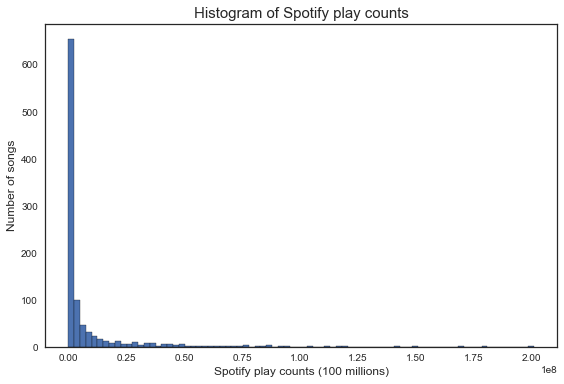

Mean:  7899715.501
Std:  19922589.896896116


In [8]:
# Plot . Histogram of SpotifyPlayCounts
sns.set(style="white")

num_bins = 80
fig = plt.figure()
ax = plt.subplot()
n, bins, patches = ax.hist(music_df.SpotifyPlayCount, num_bins, edgecolor='black')

ax.set_xlabel('Spotify play counts (100 millions)', fontsize=12)
ax.set_ylabel('Number of songs', fontsize=12)
ax.set_title('Histogram of Spotify play counts', fontsize=15)

plt.tight_layout()
plt.show()

print('Mean: ', music_df.SpotifyPlayCount.mean())
print('Std: ', music_df.SpotifyPlayCount.std())

fig.savefig('../figure/hist_spotifyplaycount.png')

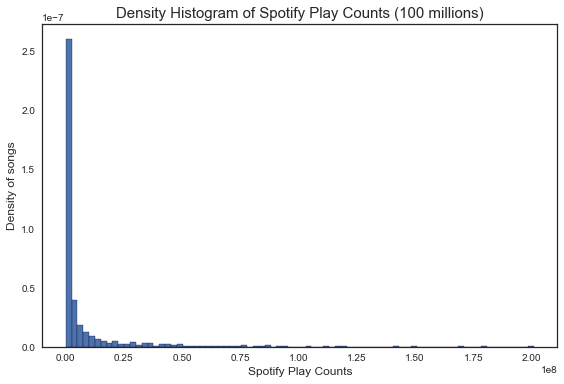

Mean:  7899715.501
Std:  19922589.896896116


In [9]:
# Plot . Density Histogram of SpotifyPlayCounts
sns.set(style="white")

num_bins = 80
fig = plt.figure()
ax = plt.subplot()
n, bins, patches = ax.hist(music_df.SpotifyPlayCount, num_bins, normed=True, edgecolor='black')

ax.set_xlabel('Spotify Play Counts', fontsize=12)
ax.set_ylabel('Density of songs', fontsize=12)
ax.set_title('Density Histogram of Spotify Play Counts (100 millions)', fontsize=15)

plt.tight_layout()
plt.show()

print('Mean: ', music_df.SpotifyPlayCount.mean())
print('Std: ', music_df.SpotifyPlayCount.std())

fig.savefig('../figure/hist_density_spotifyplaycount.png')

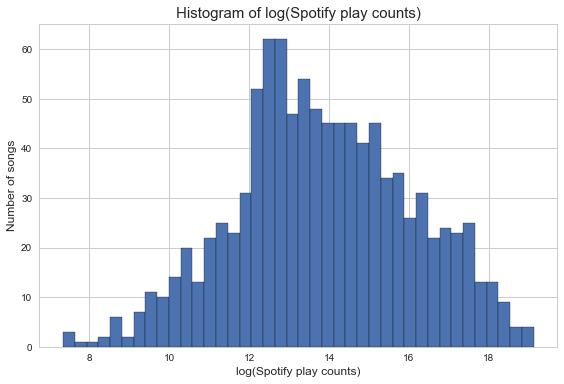

Mean:  13.84261285102407
Std:  2.213413059222591


In [10]:
# Plot . Histogram of log(SpotifyPlayCounts)
sns.set(style="whitegrid")

num_bins = 40
fig = plt.figure()
ax = plt.subplot()
n, bins, patches = ax.hist(np.log(music_df.SpotifyPlayCount), num_bins, edgecolor='black')

ax.set_xlabel('log(Spotify play counts)', fontsize=12)
ax.set_ylabel('Number of songs', fontsize=12)
ax.set_title('Histogram of log(Spotify play counts)', fontsize=15)

plt.tight_layout()
plt.show()

print('Mean: ', np.log(music_df.SpotifyPlayCount).mean())
print('Std: ', np.log(music_df.SpotifyPlayCount).std())

fig.savefig('../figure/hist_log_spotifyplaycount.png')

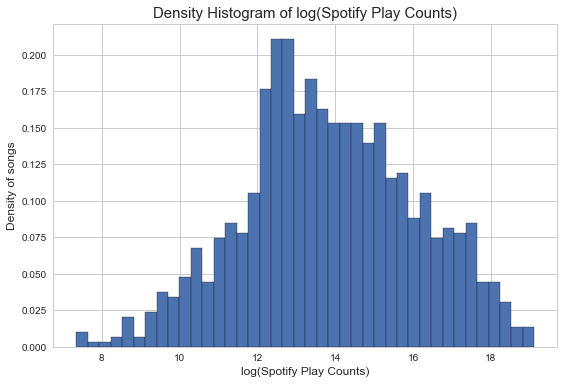

Mean:  13.84261285102407
Std:  2.213413059222591


In [11]:
# Plot . Density Histogram of log(SpotifyPlayCounts)
sns.set(style="whitegrid")

num_bins = 40
fig = plt.figure()
ax = plt.subplot()
n, bins, patches = ax.hist(np.log(music_df.SpotifyPlayCount), num_bins, normed=True, edgecolor='black')

ax.set_xlabel('log(Spotify Play Counts)', fontsize=12)
ax.set_ylabel('Density of songs', fontsize=12)
ax.set_title('Density Histogram of log(Spotify Play Counts)', fontsize=15)

plt.tight_layout()
plt.show()

print('Mean: ', np.log(music_df.SpotifyPlayCount).mean())
print('Std: ', np.log(music_df.SpotifyPlayCount).std())

fig.savefig('../figure/hist_density_log_spotifyplaycount.png')

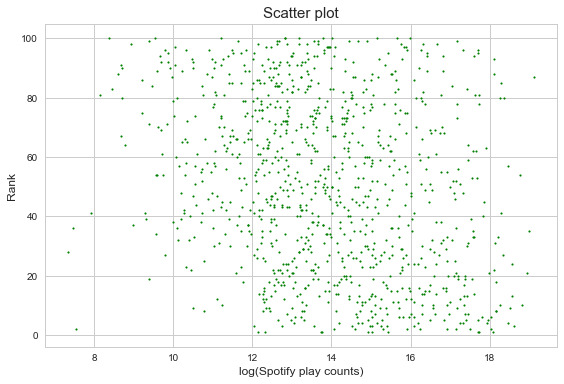

In [12]:
# Plot . Scatter plot of Rank and log(SpotifyPlayCounts)
sns.set(style="whitegrid")

fig = plt.figure()
ax = plt.subplot()
ax.scatter(np.log(music_df.SpotifyPlayCount), music_df.Rank, 
           s=3, color='green')

ax.set_xlabel('log(Spotify play counts)', fontsize=12)
ax.set_ylabel('Rank', fontsize=12)
ax.set_title('Scatter plot', fontsize=15)

plt.tight_layout()
plt.show()

fig.savefig('../figure/scatter_logspotifyplaycount_rank.png')

In [13]:
# Find a song with the highest Spotify play counts
music_df.SpotifyPlayCount.max()
music_df.loc[music_df['SpotifyPlayCount'] == music_df.SpotifyPlayCount.max()]

,Rank,Artist,Title,Year,SpotifyPlayCount
786,87,Marvin Gaye and Tammi Terrell,Ain't No Mountain High Enough,1967,201057355


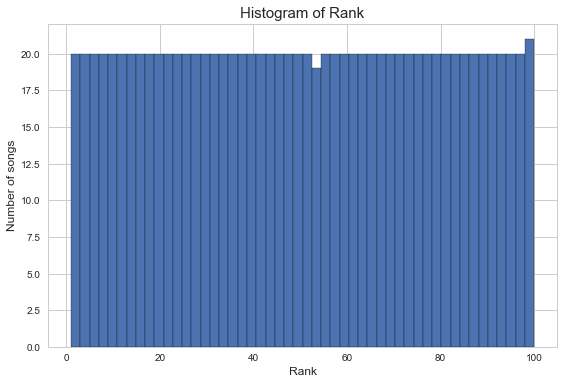

Mean:  50.547
Std:  28.922799299502792


In [46]:
# Plot . Histogram of Rank
sns.set(style="whitegrid")

num_bins = 50
fig = plt.figure()
ax = plt.subplot()
n, bins, patches = ax.hist(music_df.Rank, num_bins, edgecolor='black')
#n, bins, patches = ax.hist(np.log(music_df.Rank), num_bins, edgecolor='black')

ax.set_xlabel('Rank', fontsize=12)
ax.set_ylabel('Number of songs', fontsize=12)
ax.set_title('Histogram of Rank', fontsize=15)

plt.tight_layout()
plt.show()

print('Mean: ', music_df.Rank.mean())
print('Std: ', music_df.Rank.std())

#fig.savefig('../figure/hist_rank.png')

# 2 Data scraping

## Extract artist data

In [38]:
# Extract Artist column - File 'billboard_artist_name.csv'
artist_df = pd.DataFrame(music_df.Artist.unique())
artist_df.columns = ['Artist']

In [40]:
artist_df.to_csv('../music_data/billboard_artist_name.csv', sep=',', index=False)

## wikipedia package (python)

python code : wikipedia_scrape_wordcount.py

# 3. Model

## 3.1 Preprocessing

In [15]:
# Read artist dataset
artist_df = pd.read_csv('../music_data/billboard_artist_wordcount.csv', na_values=['NA'])

In [16]:
artist_df.describe(include='all')

,Artist,WikiWordCount
count,547,547.000000
unique,547,NaN
top,Sounds Orchestral,NaN
freq,1,NaN
mean,NaN,2166.974406
std,NaN,2617.383243
min,NaN,108.000000
25%,NaN,651.000000
50%,NaN,1278.000000
75%,NaN,2541.000000


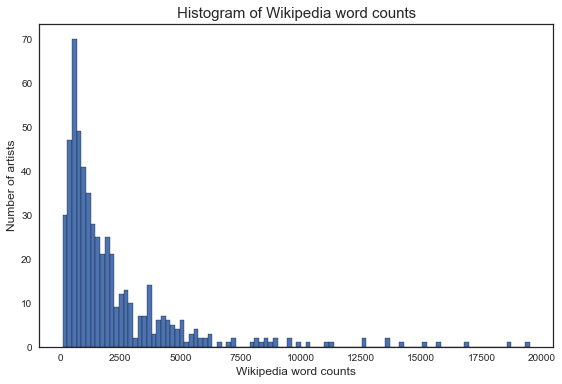

Mean:  2166.9744058500914
Std:  2617.383243489533


In [17]:
# Plot . Histogram of Wikipedia word count
sns.set(style="white")

num_bins = 100
fig = plt.figure()
ax = plt.subplot()
n, bins, patches = ax.hist(artist_df.WikiWordCount, num_bins, edgecolor='black')

ax.set_xlabel('Wikipedia word counts', fontsize=12)
ax.set_ylabel('Number of artists', fontsize=12)
ax.set_title('Histogram of Wikipedia word counts', fontsize=15)

plt.tight_layout()
plt.show()

print('Mean: ', artist_df.WikiWordCount.mean())
print('Std: ', artist_df.WikiWordCount.std())

fig.savefig('../figure/hist_wikiwordcount.png')

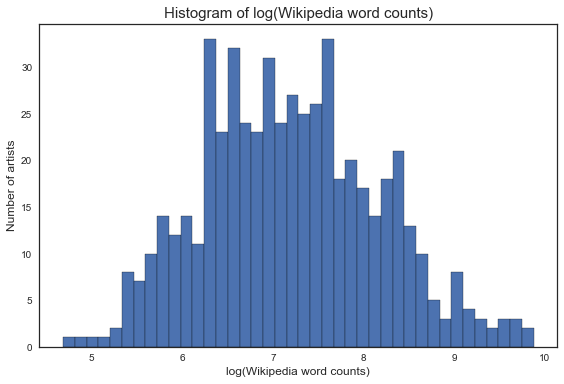

Mean:  7.199045109926113
Std:  0.9639198424125061


In [18]:
# Plot . Histogram of log(WikipediaWordCount)
sns.set(style="white")

num_bins = 40
fig = plt.figure()
ax = plt.subplot()
n, bins, patches = ax.hist(np.log(artist_df.WikiWordCount), num_bins, edgecolor='black')

ax.set_xlabel('log(Wikipedia word counts)', fontsize=12)
ax.set_ylabel('Number of artists', fontsize=12)
ax.set_title('Histogram of log(Wikipedia word counts)', fontsize=15)

plt.tight_layout()
plt.show()

print('Mean: ', np.log(artist_df.WikiWordCount).mean())
print('Std: ', np.log(artist_df.WikiWordCount).std())

fig.savefig('../figure/hist_log_wikiwordcount.png')

In [19]:
music_dataset = pd.merge(music_df_logtarget, artist_df, on='Artist')
music_dataset.describe(include='all')

,Rank,Artist,Title,Year,SpotifyPlayCount,WikiWordCount
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,547,987,NaN,NaN,NaN
top,NaN,The Beatles,Wipe Out,NaN,NaN,NaN
freq,NaN,23,2,NaN,NaN,NaN
mean,50.547000,NaN,NaN,1964.501000,13.842613,3361.737000
std,28.922799,NaN,NaN,2.875111,2.213413,3937.524284
min,1.000000,NaN,NaN,1960.000000,7.348588,108.000000
25%,25.750000,NaN,NaN,1962.000000,12.403722,951.000000
50%,50.500000,NaN,NaN,1964.500000,13.669471,1942.500000
75%,76.000000,NaN,NaN,1967.000000,15.417700,4194.000000


In [20]:
# Pearson correlation analysis
correlation = music_dataset.corr(method='pearson')
correlation

,Rank,Year,SpotifyPlayCount,WikiWordCount
Rank,1.000000,0.002575,-0.266992,-0.037377
Year,0.002575,1.000000,0.271174,0.118884
SpotifyPlayCount,-0.266992,0.271174,1.000000,0.462173
WikiWordCount,-0.037377,0.118884,0.462173,1.000000


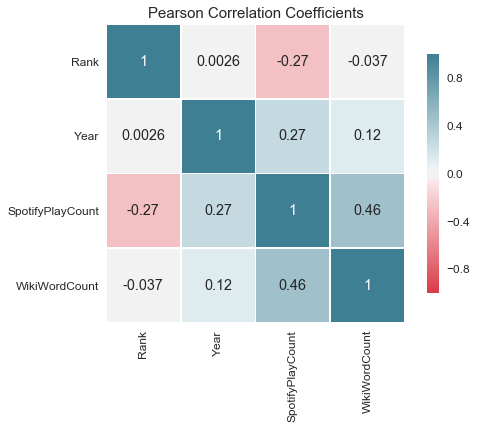

In [21]:
sns.set(style="white", font_scale=1.2)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Plot the Pearson correlation heatmap
ax = sns.heatmap(correlation, cmap=cmap, annot=True, center=0, 
                 square=True, linewidths=.7, cbar_kws={"shrink": .8})
plt.yticks(rotation=0) 
ax.set_title('Pearson Correlation Coefficients', fontsize=15)

plt.savefig('../figure/correlation_heatmap_logtarget_wwc.png')

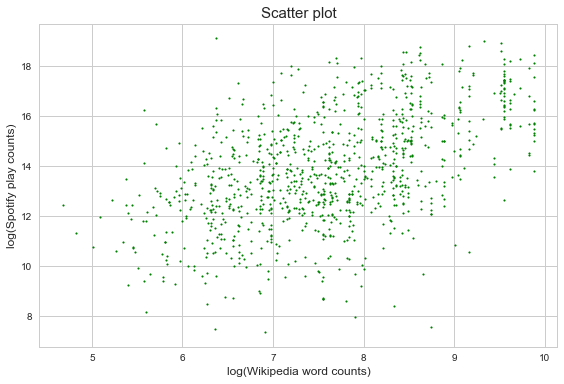

In [22]:
# Plot . Scatter plot of WikiWordCount and log(SpotifyPlayCounts)
sns.set(style="whitegrid")

fig = plt.figure()
ax = plt.subplot()
#ax.scatter(music_dataset.SpotifyPlayCount, np.log(music_dataset.WikiWordCount), 
#           s=3, color='green')
ax.scatter(np.log(music_dataset.WikiWordCount), music_dataset.SpotifyPlayCount,
           s=3, color='green')

#ax.set_xlabel('log(Spotify play counts)', fontsize=12)
#ax.set_ylabel('log(Wikipedia word counts)', fontsize=12)
ax.set_xlabel('log(Wikipedia word counts)', fontsize=12)
ax.set_ylabel('log(Spotify play counts)', fontsize=12)
ax.set_title('Scatter plot', fontsize=15)

plt.tight_layout()
plt.show()

#fig.savefig('../figure/scatter_logspotifyplaycount_logwikiwc.png')
fig.savefig('../figure/scatter_logwikiwc_logspotifyplaycount.png')

In [23]:
music_dataset_norm = music_dataset.copy()

In [24]:
music_dataset_norm.WikiWordCount = np.log(music_dataset_norm.WikiWordCount)

In [25]:
def z_score_norm(df, feature_list):
    """ Dot the z-score method on selected features in feature_list. 
        z = (x - mean)/std
    
    Args:
        df (pandas.DataFrame): data set
        feature_list   (list): a list of features, each element is a string
    """
    
    for col in feature_list:
        df[col] = (df[col] - df[col].mean())/(df[col].std())

In [26]:
z_score_norm(music_dataset_norm, feature_list=['Rank','Year','WikiWordCount'])

In [55]:
music_dataset_norm.describe(include='all')

,Rank,Artist,Title,Year,SpotifyPlayCount,WikiWordCount
count,1.000000e+03,1000,1000,1.000000e+03,1000.000000,1.000000e+03
unique,NaN,547,987,NaN,NaN,NaN
top,NaN,The Beatles,Baby It's You,NaN,NaN,NaN
freq,NaN,23,2,NaN,NaN,NaN
mean,2.797762e-17,NaN,NaN,1.023182e-14,13.842613,8.594347e-15
std,1.000000e+00,NaN,NaN,1.000000e+00,2.213413,1.000000e+00
min,-1.713078e+00,NaN,NaN,-1.565505e+00,7.348588,-2.788130e+00
25%,-8.573513e-01,NaN,NaN,-8.698794e-01,12.403722,-6.998582e-01
50%,-1.625016e-03,NaN,NaN,-3.478126e-04,13.669471,-1.425531e-02
75%,8.800324e-01,NaN,NaN,8.691837e-01,15.417700,7.246168e-01


## 3.2  Baseline Model - Linear regression

In [56]:
feature_base = music_dataset_norm.loc[:,['Rank','Year']]
target = music_dataset_norm.loc[:,'SpotifyPlayCount']

In [57]:
linear_regr_base = linear_model.LinearRegression()

In [58]:
def performance_statistics(model_name, target, pred):
    '''Plot a table of performance statistics
    
    Args:
        target (Series):  target data
        pred   (ndarray): predition results
    '''
    mae   = mean_absolute_error(target, pred)
    medae = median_absolute_error(target, pred)
    r2    = r2_score(target, pred)
    
    columns = ['Model', 'Mean Absolute Error', 'Median Absolute Error', 'R2 Score']
    cell_text = [['%s' % model_name, '%1.3f' % mae, '%1.3f' % medae, '%1.3f' % r2]]
    
    nrow = 1
    ncol = len(columns)
    
    fig = plt.figure(figsize=(ncol*2, nrow*0.2))
    ax = fig.add_subplot(111)
    ax.axis('off')
    
    table = ax.table(cellText=cell_text, colLabels=columns, loc='center')
    table.set_fontsize(14)
    table.scale(1.5, 1.5)
    
#     fig.savefig('../figure/%s_stat_table.png' % model_name)

In [59]:
def error_distribution(model_name, target, pred):
    '''Plot a histogram of the error distribution
    
    Args:
        target (Series):  target data
        pred   (ndarray): predition results
    '''
    err = pred - target   # error is a Series
    min_err = err.min()
    max_err = err.max()
    fig = plt.figure()
    ax = err.plot.hist(bins=20, figsize=(7,7), edgecolor='black')
    ax.set_xticks(np.arange(math.floor(min_err), math.ceil(max_err)))
    ax.set_title('%s - Error Distribution' % model_name, fontsize=18)
    ax.set_xlabel('Error', fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.grid()
    
    fig.savefig('../figure/%s_error_dist.png' % model_name)

In [88]:
def permutation_test(model_name, model, feature, target, pred):
    '''do permuation tests
    
    Args:
        model_name: model
        feature (DataFrame): feature data
        target (Series):  target data
        pred   (ndarray): predition results
    ''' 
    #pred = cross_val_predict(model, X=feature, y=target, cv=10)
    mae = mean_absolute_error(target, pred)
    mae_list = [mae]
    count = 0
    while count<100:
        count=count+1 
        target_to_list=target.tolist()
        shuffle(target_to_list)
        target_per = pd.DataFrame({'playcount':target_to_list})
        pred1 = cross_val_predict(model, X=feature, y=target_per, cv=10)
        mae_shuffle=mean_absolute_error(target,pred1)
        mae_list.append(mae_shuffle)
    num_bins = 20
    fig, ax = plt.subplots(figsize=(7,7))
    n, bins, patches = ax.hist(mae_list, num_bins, edgecolor='black')
    ax.set_title('%s - Permutation Test' % model_name, fontsize=18)
    #ax.set_xlabel('$Log(playcount)-mae$', fontsize=14)
    ax.set_xlabel('Target - Mean Absolute Error', fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.get_children()[0].set_color('r')
    ax.grid()
    
    fig.savefig('../figure/%s_permutation.png' % model_name)

In [60]:
def prediction_error_map(model_name, target, pred):
    '''Plot the prediction error map (similar to confusion matrices in classification problems)
    
    Args:
        target (Series):  target data
        pred   (ndarray): predition results
    '''
    y_min = target.min()*0.98
    y_max = target.max()*1.01
    fig, ax = plt.subplots(figsize=(7,7))
    #plt.scatter(target, pred, edgecolor='black', s=15)
    plt.scatter(target, pred, s=13)
    ax.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2)
    ax.set_xticks(np.arange(math.floor(y_min),math.ceil(y_max)))
    ax.set_yticks(np.arange(math.floor(y_min),math.ceil(y_max)))
    ax.set_title('%s - Prediction Error Map' % model_name, fontsize=18)
    #ax.set_xlabel('Real Spotify (log) Play Count', fontsize=14)
    ax.set_xlabel('Target', fontsize=14)
    ax.set_ylabel('Prediction', fontsize=14)
    ax.axis([y_min,y_max,y_min,y_max])
    ax.grid()
    
    fig.savefig('../figure/%s_error_map.png' % model_name)

In [61]:
def evaluation(model, feature, target):
    """ Run the model on X and y using cross validation. Then output:
        1) performance statistics
        2) error distributions
        3) prediction error map
        4) permutation test
        
    Args:
        model   (object):    the machine learning object to fit the data
        feature (DataFrame): feature data
        target  (Series):    target  data
        
    This is version 0.11.10 (Nov. 10th)
    
    Todo:
        parameter "model" should be a list of models in the future
    """
    
    model_name = str(model)        # 'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)'
    end = model_name.find('(')
    model_name = model_name[0:end] # 'LinearRegression'
    
    '''Do the prediction by cross validation'''
    pred = cross_val_predict(model, X=feature, y=target, cv=10)  # default is 10-fold
    
    print('This is the plots/reports of %s'  % model_name)
        
    error_distribution(model_name, target, pred)
    
    prediction_error_map(model_name, target, pred)
    
#     permutation_test(model_name, model, feature, target, pred)
    
    performance_statistics(model_name, target, pred)

This is the plots/reports of LinearRegression


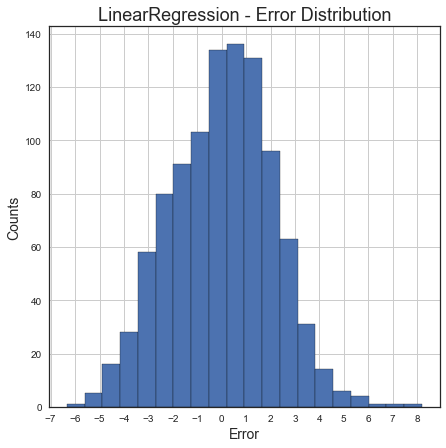

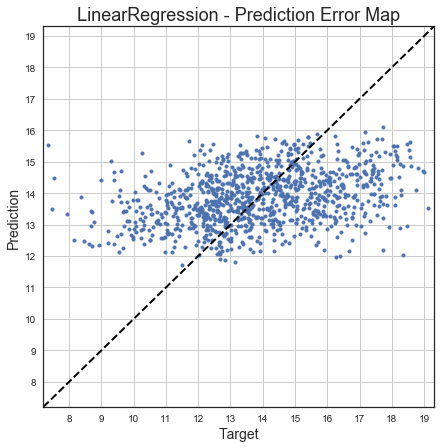

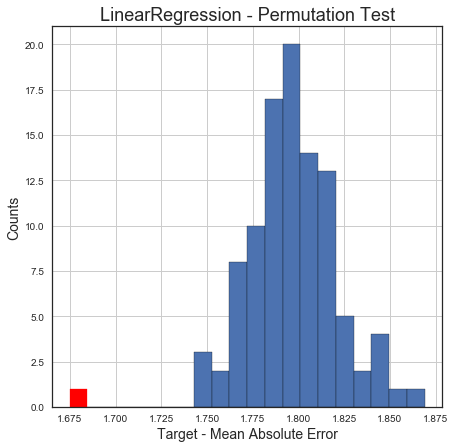

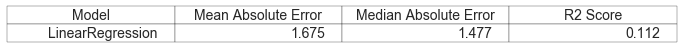

In [89]:
sns.set(style="white")
evaluation(linear_regr_base, feature_base, target)

## 3.3  Advanced Model - Linear regression

In [62]:
feature = music_dataset_norm.loc[:,['Rank','Year','WikiWordCount']]
target = music_dataset_norm.loc[:,'SpotifyPlayCount']

In [91]:
linear_regr_adv = linear_model.LinearRegression()

This is the plots/reports of LinearRegression


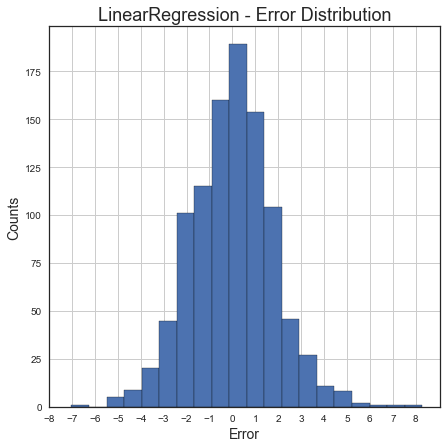

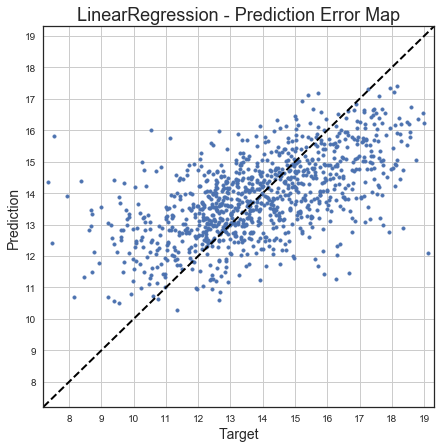

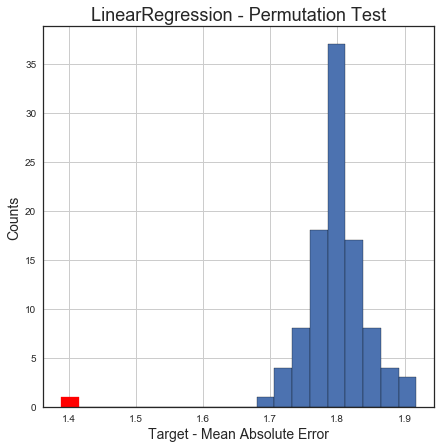

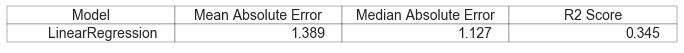

In [92]:
sns.set(style="white")
evaluation(linear_regr_adv, feature, target)

## 3.4 Advanced Model - Support Vector Regression

In [63]:
svr_poly = SVR(kernel='linear', C=1e3)

This is the plots/reports of SVR


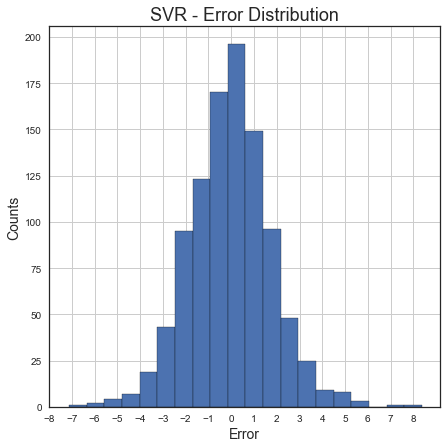

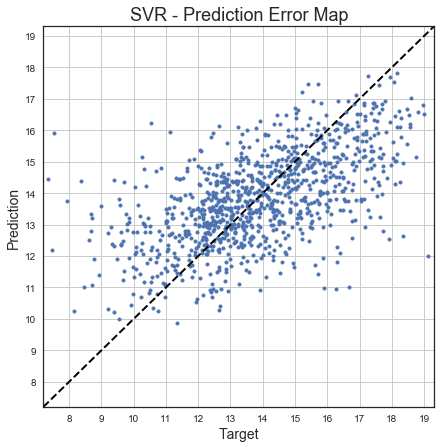

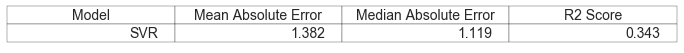

In [64]:
sns.set(style="white")
evaluation(svr_poly, feature, target)

In [40]:
#artist_df = pd.read_csv('../music_data/billboard_artist_name.csv', na_values=['NA'])
music_corgis_df = pd.read_csv('../../../Project/music_corgis.csv', na_values=['NA'])

result = pd.merge(music_df, music_corgis_df, how='left', 
                  left_on=['Artist','Title'], right_on=['artist.name','title'])

In [204]:
# result

In [42]:
music_corgis_join = result
music_corgis_join.to_csv('../music_data/music_corgis_join_artist-title.csv', sep=',', index=False)

In [43]:
result = pd.merge(music_df, music_corgis_df, how='left', 
                  left_on='Artist', right_on='artist.name')

In [205]:
# result

In [45]:
music_corgis_join = result
music_corgis_join.to_csv('../music_data/music_corgis_join_artist.csv', sep=',', index=False)

# Wikipedia Scraping (Beautiful Soup)

In [28]:
import bs4
#from urllib.request import urlopen as uReq
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

#my_url = 'https://en.wikipedia.org/wiki/Barry_Sadler'
my_url = 'https://en.wikipedia.org/wiki/The_Beatles'

# Open up connection, grab the page
#uClient = uReq(my_url)
uClient = urlopen(my_url)

page_html = uClient.read()
uClient.close()

# html parsing
page_soup = soup(page_html, "html.parser")
page_soup.h1

<h1 class="firstHeading" id="firstHeading" lang="en">The Beatles</h1>

In [29]:
# Grab each product
#containers = page_soup.findAll("div", {"class":"item-container"})
#containers = page_soup.findAll("div", {"class":"mw-body-content"})
#containers = page_soup.findAll("div", {"class":"mw-content-ltr"})
containers = page_soup.findAll("table", {"class":"infobox vcard plainlist"})
len(containers)

1

In [41]:
from bs4 import BeautifulSoup
#import urllib
import urllib.request
import re
company = ['Lockheed_Martin', 'Phillips_66']

for c in company:
    #r = urllib.urlopen('https://en.wikipedia.org/wiki/' + c).read()
    r = urllib.request.urlopen('https://en.wikipedia.org/wiki/' + c).read()

    soup = BeautifulSoup(r, "lxml")
    for tr in soup.findAll('tr'):
        trText = tr.text
        #print (trText)
#         if re.search(r"^\bRevenue\b$", trText):
#             match = re.search(r"\w+\$(?:\s+)?[\d\.]+.{1}\w+", trText)
#             revenue = match.group()
#             print (c+"\n"+revenue+"\n")

In [161]:
artist_df = pd.read_csv('../music_data/billboard_artist.csv', na_values=['NA'])

In [125]:
artist_df.iloc[0]

Artist                                         Percy Faith
URL              https://en.wikipedia.org/wiki/Percy_Faith
WikiWordCount                                         1180
Name: 0, dtype: object

In [162]:
from bs4 import BeautifulSoup
import urllib

#site= "http://en.wikipedia.org/wiki/Aldi"
#site = 'https://en.wikipedia.org/wiki/The_Beatles'
#site = 'https://en.wikipedia.org/wiki/Percy_Sledge'
#sites = ['https://en.wikipedia.org/wiki/The_Beatles', 'https://en.wikipedia.org/wiki/Percy_Sledge']
results = []

no_infobox = []
#no_infobox = pd.DataFrame(columns=['url'])

for i in range(len(artist_df.Artist)): #range(len(artist_df.Artist)): #range(3):
#for site in sites:
    site = artist_df.iloc[i].URL
    page = urllib.request.urlopen(site)
    
    result = {}
    result['Artist'] = artist_df.iloc[i].Artist
    exceptional_row_count = 0
    
    soup = BeautifulSoup(page.read(), "lxml")
    #table = soup.find('table', class_='infobox vcard')
    table = soup.find('table', class_='infobox vcard plainlist')
    if table == None:
       table = soup.find('table', class_='infobox biography vcard')
    if table == None:
        #print(str(i+2)+": "+str(type(table)))
        no_infobox.append(site)
        results.append(result)
        continue
    
    for tr in table.find_all('tr'):
        if tr.find('th'):
            #result[tr.find('th').text] = tr.find('td').text
            if tr.find('td'):
                result[tr.find('th').text] = tr.find('td').text
        else:
            # the first row image falls here
            exceptional_row_count += 1
    if exceptional_row_count > 1:
        print ('WARNING ExceptionalRow>1: ')
        #print ('WARNING ExceptionalRow>1: ', table)
    #print (result)
    results.append(result)

WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 
WARNING ExceptionalRow>1: 


In [163]:
len(results)

547

In [164]:
no_infobox
df = pd.DataFrame(no_infobox, columns=['url'])
for i in range(len(df)):
    print(df.iloc[i].url)

https://en.wikipedia.org/wiki/Mark_Dinning
https://en.wikipedia.org/wiki/The_Hollywood_Argyles
https://en.wikipedia.org/wiki/Toni_Fisher
https://en.wikipedia.org/wiki/Ferrante_%26_Teicher
https://en.wikipedia.org/wiki/Jimmy_Charles
https://en.wikipedia.org/wiki/Forever_(The_Little_Dippers_song)
https://en.wikipedia.org/wiki/Skip_%26_Flip
https://en.wikipedia.org/wiki/Johnny_and_the_Hurricanes
https://en.wikipedia.org/wiki/Larry_Hall
https://en.wikipedia.org/wiki/Bobby_Lewis
https://en.wikipedia.org/wiki/The_Highwaymen_(folk_band)
https://en.wikipedia.org/wiki/The_Jive_Five
https://en.wikipedia.org/wiki/The_String-A-Longs
https://en.wikipedia.org/wiki/Joe_Dowell
https://en.wikipedia.org/wiki/The_Mar-Keys
https://en.wikipedia.org/wiki/The_Dovells
https://en.wikipedia.org/wiki/Linda_Scott
https://en.wikipedia.org/wiki/Shep_and_the_Limelites
https://en.wikipedia.org/wiki/Jimmy_Wisner
https://en.wikipedia.org/wiki/Ral_Donner
https://en.wikipedia.org/wiki/Buzz_Clifford
https://en.wikipedia.o

In [ ]:
artist_infobox_df = pd.DataFrame(results)
artist_infobox_df

In [166]:
artist_infobox_df.to_csv('../../../Project/billboard_artist_infobox.csv', sep=',', index=False)

In [13]:
#containers[0].div.p
#containers[0].prettify()
list(containers[0].children)
#[type(item) for item in list(containers[0].children)]
#[item for item in list(containers[0].children)] 
#containers[0].tr.th

['\n', <tr>
 <th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;background-color: #b0c4de"><span class="fn org">The Beatles</span></th>
 </tr>, '\n', <tr>
 <td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:The_Fabs.JPG" title="A square quartered into four head shots of young men with moptop haircuts. All four wear white shirts and dark coats."><img alt="A square quartered into four head shots of young men with moptop haircuts. All four wear white shirts and dark coats." data-file-height="1110" data-file-width="1110" height="220" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/df/The_Fabs.JPG/220px-The_Fabs.JPG" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/df/The_Fabs.JPG/330px-The_Fabs.JPG 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/df/The_Fabs.JPG/440px-The_Fabs.JPG 2x" width="220"/></a>
 <div>The Beatles in 1964. Clockwise from top left: <a href="/wiki/John_Lennon" title="John Lennon">John Lennon</a>, <a hre

In [26]:
name = list(containers[0].children)[5]
name.get_text()

'\nBorn\n(1940-11-01)November 1, 1940\nCarlsbad, New Mexico, U.S.\n'

In [106]:
info_table = page_soup.findAll("table", {"class":"infobox vcard"})
info_table

[]

In [42]:
info_table[0]

<table class="infobox vcard" style="width:22em;width:315px;border-spacing:2px;">
<tr>
<th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;background-color:#B0C4DE;"><span class="fn">Barry Sadler</span></th>
</tr>
<tr>
<td colspan="2" style="text-align:center;border-bottom: 1px solid #aaa;; line-height: 1.5em"><a class="image" href="/wiki/File:Barry_Sadler.png"><img alt="Barry Sadler.png" data-file-height="494" data-file-width="494" height="220" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Barry_Sadler.png/220px-Barry_Sadler.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Barry_Sadler.png/330px-Barry_Sadler.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Barry_Sadler.png/440px-Barry_Sadler.png 2x" width="220"/></a>
<div style="font-size: 100%">Barry Sadler in 1966</div>
</td>
</tr>
<tr>
<th scope="row" style="padding-right: 1em">Born</th>
<td><span style="display:none">(<span class="bday">1940-11-01</span>)</span>November 1

In [52]:
info_table[0].text

'\n\nBarry Sadler\n\n\n\nBarry Sadler in 1966\n\n\n\nBorn\n(1940-11-01)November 1, 1940\nCarlsbad, New Mexico, U.S.\n\n\nDied\nNovember 5, 1989(1989-11-05) (aged\xa049)\nMurfreesboro, Tennessee, U.S.\n\n\nAllegiance\n\xa0United States of America\n\n\nService/branch\n\xa0United States Air Force (1958-1962)\n\xa0United States Army (1962-1967)\n\n\nYears\xa0of service\n1958-1967\n\n\nRank\n Staff Sergeant\n\n\nUnit\n U.S. Army Special Forces - 7th Special Forces Group (Airborne)\n\n\nBattles/wars\nVietnam War\n\n'

In [56]:
info_table[0].th.span.text

'Barry Sadler'

In [ ]:
product_name.replace(",", "|")

In [3]:
artist_infobox_df = pd.read_csv('../../../Project/billboard_artist_infobox.csv', na_values=['NA'])

In [4]:
artist_infobox_df.describe(include='all')

,Biographical data,Notable works,Allegiance,Alma mater,Also known as,Area(s),Artist,Associated acts,Awards,Birth name,...,Residence,Resting place,Service/branch,Spouse(s),Succeeded by,Unit,Website,Years active,Years active,Years of service
count,1,1,1,7,90,1,547,205,5,194,...,4,11,1,37,1,1,189,394,29,1
unique,1,1,1,7,84,1,547,200,5,190,...,3,11,1,37,1,1,173,284,28,1
top,\n\n\n\nBiographical data\n\n\n\n\n\n\nBorn\nF...,"Captain America, Fighting American, Boys' Ranc...",United States,University of Hartford Hartt School,The Young Rascals,"Writer, Penciller, Editor, Publisher",Herb Alpert and The Tijuana Brass,"The Tijuana Brass, The Baja Marimba Band, Los ...",Aretha Franklin awards,Autry DeWalt Mixon Jr.,...,"Malibu, California, U.S.","Forest Cemetery, Couer d'Alene, Idaho, U.S.\n4...",United States Air Force,Jack Gilardi (m. 1965; div. 1981)\nGlen Holt ...,Barry Gordon,12th Radio Squadron Mobile,Official website,1958–present,1956–present,1950–1954
freq,1,1,1,1,2,1,1,2,1,2,...,2,1,1,1,1,1,12,14,2,1


In [5]:
artist_infobox_df.describe(include='all').to_csv('../../../Project/stat_infobox.csv', sep=',', index=False)